# Process of Data Science - Assignment 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## 1. Regression
Regressions are a common statistical technique used to analyse the dependence between various parameters in a dataset. They provide both predictions, as well as estimates of various effects. There are, however, many kinds of regressions. The Python statsmodels package implements many types of regression, only some of which we covered in class.

The following dataset contains various information about housing in the Boston area: https://www.kaggle.com/vikrishnan/boston-house-prices

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

### 1a. Understanding the Dataset
Column Descriptions:
- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to ﬁve Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per \$10,000 
- PTRATIO: pupil-teacher ratio by town
- B: $1000(Bk−0.63)^2$ where $Bk$ is the proportion of blacks by town
- LSTAT: % lower status of the population
- MEDV: Median value of owner-occupied homes in \$1000s

Column descriptions are gathered from https://www.kaggle.com/vikrishnan/boston-house-prices

In [5]:
def plot_data_distributions(df):
    """
    Plots histograms or barcharts for each column of the given dataset.
    df: the dataset as a pandas dataframe
    """
    fig = plt.figure(figsize=(20,15))
    num_cols = 4
    num_rows = math.ceil(float(df.shape[1]) / num_cols)
    for i, column in enumerate(df.columns):
        ax = fig.add_subplot(num_rows, num_cols, i + 1)
        ax.set_title(column)
        if df.dtypes[column] == np.object:
            # The column contains non-numerical values. Plot a bar chart.
            df[column].value_counts().plot(kind="bar", axes=ax)
        else:
            # The column contains numerical values. Plot a histogram
            df[column].hist(axes=ax)
            plt.xticks(rotation="vertical")
    plt.subplots_adjust(hspace=0.7, wspace=0.2)

#### Compute summary / descriptive statistics

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


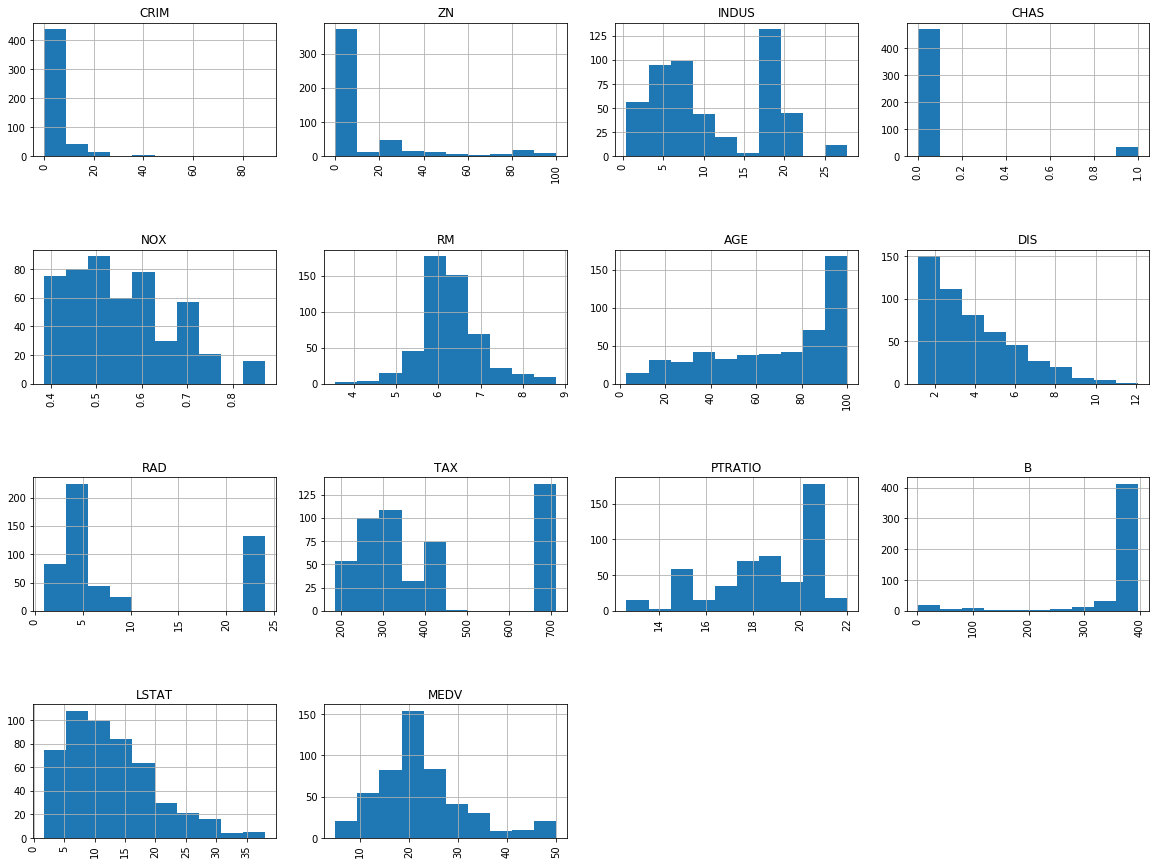

In [7]:
plot_data_distributions(df)

- The per capita crime rate by town is mostly 0-10
- The proportion of residential land zoned for lots over 25,000 sq.ft. is mostly 0-10
- The proportion of non-retail business acres per town is mostly 17-19 and 3-8
- The Charles River dummy variable is mostly 0 and rarely 1
- The nitric oxides concentration is mostly between 0.4-0.6 parts per 10 million.
- The average number of rooms per dwelling is mostly 6-7
- The proportion of owner-occupied units built prior to 1940 is mostly 90-100
- The weighted distances to ﬁve Boston employment centers is mostly 1-3
- The index of accessibility to radial highways is mostly 3-5, with many outliers at 22-24
- The full-value property-tax rate per \$10,000 is mostly 650-700, or in the 200-450 range.
- The pupil-teacher ratio by town is mostly 20-21
- B is mostly 350-400, with a few outliers at 0-100
- The percentage of the lower status of the population is mostly 5-15
- The Median value of owner-occupied homes in \$1000s is mostly around 20-22

In [8]:
corr = df.corr()
corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


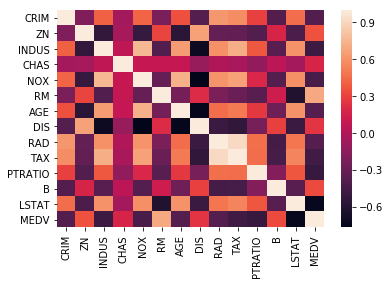

In [9]:
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

There are strong correlations between:
- TAX and RAD
- TAX and NOX
- INDUS and NOX
- INDUS and TAX
- RM and MEDV

In [10]:
df[['TAX', 'RAD']].head(15)

,TAX,RAD
0,296,1
1,242,2
2,242,2
3,222,3
4,222,3
5,222,3
6,311,5
7,311,5
8,311,5
9,311,5


In [11]:
df[['TAX', 'NOX']].head(15)

,TAX,NOX
0,296,0.538
1,242,0.469
2,242,0.469
3,222,0.458
4,222,0.458
5,222,0.458
6,311,0.524
7,311,0.524
8,311,0.524
9,311,0.524


In [12]:
df[['INDUS', 'NOX']].head(15)

,INDUS,NOX
0,2.31,0.538
1,7.07,0.469
2,7.07,0.469
3,2.18,0.458
4,2.18,0.458
5,2.18,0.458
6,7.87,0.524
7,7.87,0.524
8,7.87,0.524
9,7.87,0.524


In [13]:
df[['INDUS', 'TAX']].head(15)

,INDUS,TAX
0,2.31,296
1,7.07,242
2,7.07,242
3,2.18,222
4,2.18,222
5,2.18,222
6,7.87,311
7,7.87,311
8,7.87,311
9,7.87,311


In [14]:
df[['RM', 'MEDV']].head(15)

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2
5,6.430,28.7
6,6.012,22.9
7,6.172,27.1
8,5.631,16.5
9,6.004,18.9


There are strong negative correlations between:
- AGE and DIS
- NOX and DIS
- MEDV and LSTAT
- INDUS and DIS
- RM and LSTAT

In [15]:
df[['AGE', 'DIS']].head(15)

,AGE,DIS
0,65.2,4.0900
1,78.9,4.9671
2,61.1,4.9671
3,45.8,6.0622
4,54.2,6.0622
5,58.7,6.0622
6,66.6,5.5605
7,96.1,5.9505
8,100.0,6.0821
9,85.9,6.5921


In [16]:
df[['NOX', 'DIS']].head(15)

,NOX,DIS
0,0.538,4.0900
1,0.469,4.9671
2,0.469,4.9671
3,0.458,6.0622
4,0.458,6.0622
5,0.458,6.0622
6,0.524,5.5605
7,0.524,5.9505
8,0.524,6.0821
9,0.524,6.5921


In [17]:
df[['MEDV', 'LSTAT']].head(15)

,MEDV,LSTAT
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
4,36.2,5.33
5,28.7,5.21
6,22.9,12.43
7,27.1,19.15
8,16.5,29.93
9,18.9,17.10


In [18]:
df[['INDUS', 'DIS']].head(15)

,INDUS,DIS
0,2.31,4.0900
1,7.07,4.9671
2,7.07,4.9671
3,2.18,6.0622
4,2.18,6.0622
5,2.18,6.0622
6,7.87,5.5605
7,7.87,5.9505
8,7.87,6.0821
9,7.87,6.5921


In [19]:
df[['RM', 'LSTAT']].head(15)

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
5,6.430,5.21
6,6.012,12.43
7,6.172,19.15
8,5.631,29.93
9,6.004,17.10


#### Check for missing values, NaNs and major outliers (beyond +/- 4 std dev)

In [20]:
def remove_all_major_outliers(df):
    """
    Removes all major outliers beyond +/- 4 standard deviation
    for the given Pandas DataFrame.
    df: The Pandas DataFrame to remove all major outliers from
    """
    for column in df.columns:
        df[np.abs(df[column] - df[column].mean()) <= (4 * df[column].std())]
    return df

In [21]:
df.dropna(inplace=True)
df = remove_all_major_outliers(df)

### 1b. Develop a hypothesis / conclusion
What dependent variable(s) do you think are related to other parameters? Many are related, but pick at least 2 conclusions you want to test. These should be interesting (conceptually) and statistically sound (you have a reason to believe the data could be used to support or refute them)

After investigating the correlations above, I've made the following two hypothesese:

#### Hypothesis 1: TAX is related to RAD, NOX, and INDUS
- Dependent variable: TAX
- Independent variables: RAD, NOX, and INDUS

Variable Types:
- TAX: Ordinal
- RAD: Ordinal
- NOX: Ordinal
- INDUS: Ordinal

#### Hypothesis 2: LSTAT is not related to MEDV and RM
- dependent variable: LSTAT
- independent variable: MEDV, RM

Variable Types:
- MEDV: Ordinal
- LSTAT: Ordinal
- RM: Ordinal

### 1c. Choose a type of regression (from statsmodels)
- linear regression, logit models, etc
- For guidance, see https://stats.idre.ucla.edu/other/mult-pkg/whatstat/.

#### Hypothesis 1: OLS Regression
#### Hypothesis 2: OLS Regression

### 1d. Understand the important diagnostics
- This will take some outside research for some types of models. In addition to the statsmodels documentation UCLA has a great set of tutorials at https://stats.idre.ucla.edu/.
- Make sure you understand how your models will be assessed.

#### Performance Assessment
- R-Squared: measure of the model's performance
- Adjusted R-Squared: measure of the model's performance (a bit lower than R-Squared due to it reflecting the model's complexity)

#### Explanatory Variable(s) Assessment
- Coefficient: reflects both the strength and the type of relationship the variable has to the dependent variable. If the sign is negative, then the relationship is negative (e.g. the larger X is, the smaller Y is). Otherwise, the relationship is positive (e.g. the larger X is, the larger Y is). The coefficient reflects the expected change in the dependant variable for every 1 unit change in the given explanatory variable when all other variables are constant.
- t: The t-test is used to assess whether or not the explanatory variable is statistically significant.

### 1e. Specify and fit your models
- Report model-wide diagnostics (GoF and model-selection values like AIC)
- Report estimates of the effects
- Report (and plot) coefficient estimates and confidence intervals from your models.

#### Hypothesis 1

In [22]:
# Define X and y
X = df[['RAD', 'NOX', 'INDUS']]
y = df[['TAX']]

# Specify the model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

In [23]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    TAX   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     7122.
Date:                Wed, 27 Jun 2018   Prob (F-statistic):               0.00
Time:                        21:03:32   Log-Likelihood:                -2845.3
No. Observations:                 506   AIC:                             5697.
Df Residuals:                     503   BIC:                             5709.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RAD           13.1580      0.433     30.416      0.000      12.308      14.008
NOX          429.8613     13.310     32.295      0.000     403.711     456.012
INDUS          3.4857      0.626      5.568      0.000       2.256       4.716
==============================================================================
Omnibus:                      108.644   Durbin-Watson:                   0.424
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.243
Skew:                           0.980   Prob(JB):                     1.19e-77
Kurtosis:                       6.600   Cond. No.                         78.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
results.conf_int()

,0,1
RAD,12.308091,14.007974
NOX,403.710661,456.011983
INDUS,2.255848,4.715503


#### Result Take-aways
- The goodness of fit (R-Squared) is 97.7%
- The t-tests are all statistically significant
- The coefficients are contained within the 95% confidence intervals

#### Hypothesis 1 Conclusion: The hypothesis is TRUE

#### Hypothesis 2

In [25]:
# Define X and y
X = df[['MEDV', 'RM']]
y = df[['LSTAT']]

# Specify the model
model = sm.OLS(y, X)

# Fit the model
results = model.fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  LSTAT   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1317.
Date:                Wed, 27 Jun 2018   Prob (F-statistic):          7.33e-201
Time:                        21:03:32   Log-Likelihood:                -1609.3
No. Observations:                 506   AIC:                             3223.
Df Residuals:                     504   BIC:                             3231.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEDV          -0.7281      0.034    -21.458      0.000      -0.795      -0.661
RM             4.5716      0.131     35.014      0.000       4.315       4.828
==============================================================================
Omnibus:                      146.466   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              401.764
Skew:                           1.410   Prob(JB):                     5.73e-88
Kurtosis:                       6.332   Cond. No.                         13.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
results.conf_int()

,0,1
MEDV,-0.794741,-0.661419
RM,4.315080,4.828113


#### Result take-aways
- The goodness of fit (R-Squared) is 83.9%
- The t-tests are all statistically significant
- The coefficients are contained within the 95% confidence intervals

#### Hypothesis 2 Conclusion: The hypothesis is TRUE

## 2 Classification
The idea of this task is to determine whether it is possible to predict whether an individual's annual income exceeds $50,000 based on demographic information.

You will use this dataset extracted from the 1994 U.S. Census: https://archive.ics.uci.edu/ml/datasets/Adult

Your task is to compare at least three machine learning methods to see which methods work best for this task when evaluated in the testing set (adult.test). On the other file (adult.data) you should use the first 80\% of these data as training while the remaining 20\% will be used for validation. 

Scikit-learn implements a number of suitable classification algorithms: 

http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

And be sure to properly preprocess your data, especially Standardization and Binarization:

http://scikit-learn.org/stable/modules/preprocessing.html

### Load the training dataset

In [28]:
df2 = pd.read_csv('adult_data.csv')

In [29]:
df2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [30]:
df2.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

#### Column Descriptions
- age: continuous.
- workclass: {Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked}
- fnlwgt: continuous
- education: {Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool}
- education-num: continuous
- marital-status: {Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse}
- occupation: {Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces}
- relationship: {Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried}
- race: {White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black}
- sex: {Female, Male}
- capital-gain: continuous
- capital-loss: continuous
- hours-per-week: continuous
- native-country: {United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands}
- income: {<=50k, >50k}

### Load the test dataset
1x3 Cross Validator

In [31]:
df2_test = pd.read_csv('adult_test.csv')

In [32]:
df2_test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


### Analyze the data

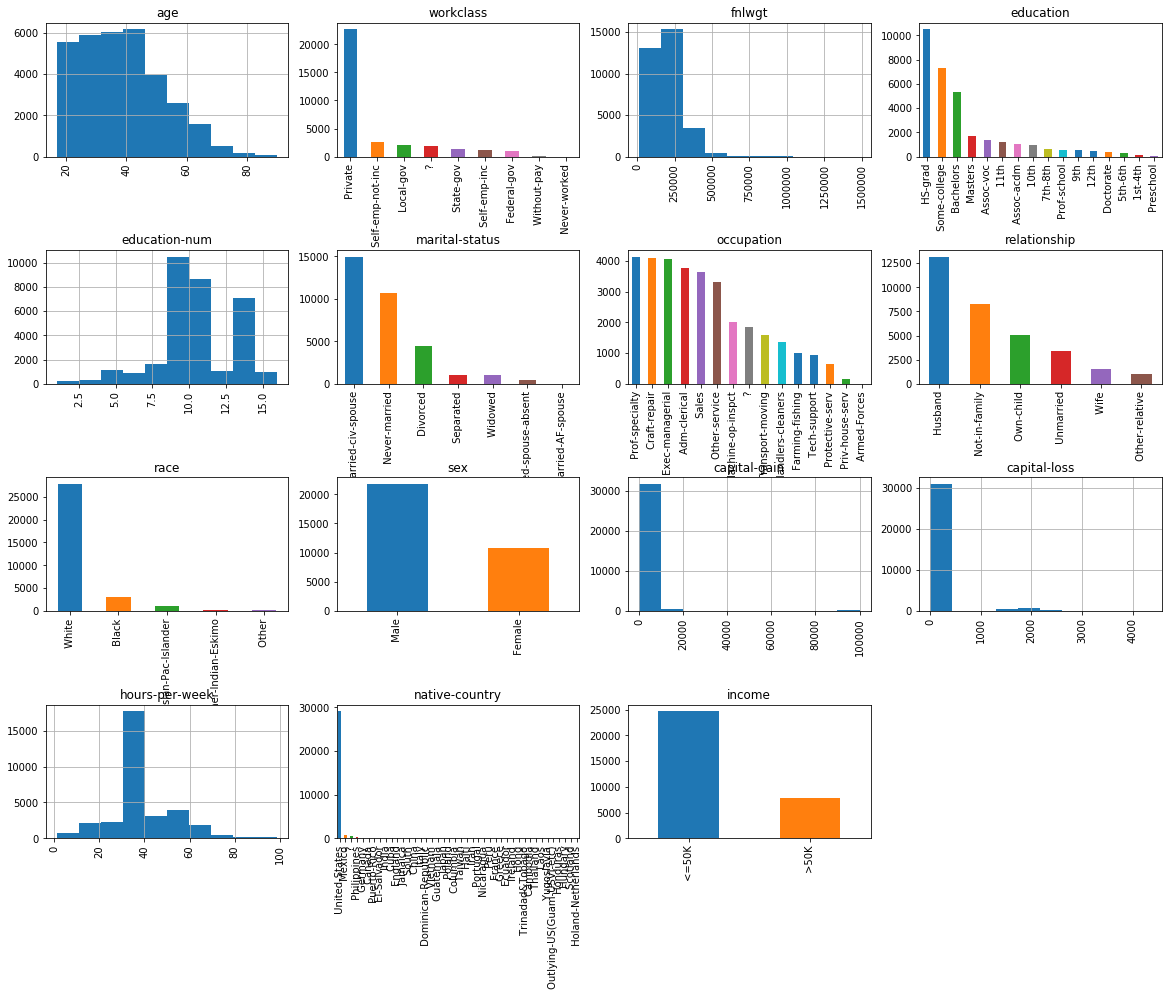

In [33]:
plot_data_distributions(df2)

From this visualization we can see that the majority of people in this dataset are:
- 25-45 years old
- work in the private sector
- high school graduates
- married or never married
- white
- male
- work 30-40 hours per week
- from USA

The interesting facts in this dataset is that we're looking at mostly <b>white 25-45 year old males from USA<b>.

### Pre-Processing

#### Train set

In [65]:
# Replace all string columns with numeric columns
for column in df2.columns:
    if df2.dtypes[column] == np.object:
        # The column is a string column. Encode it to numeric values.
        df2[column] = LabelEncoder().fit_transform(df2[column])

# drop all rows with NaN values
df2.dropna(inplace=True)

# Define X and y
X = df2.loc[:, [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',]].values
y = df2.loc[:, 'income'].values

print(X.shape, y.shape)

(32561, 14) (32561,)


In [66]:
corr = df2.corr()
corr

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,-0.001151,0.234037
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.049742,0.095981,0.033835,0.012216,0.138962,-0.007690,0.051604
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,-0.021291,0.026858,0.000432,-0.010252,-0.018768,-0.051966,-0.009463
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.030046,0.016746,0.055510,0.064288,0.079317
education-num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.122630,0.079923,0.148123,0.050840,0.335154
marital-status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.043393,-0.034187,-0.190519,-0.023819,-0.199307
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.006763,0.080296,0.025505,0.017987,0.080383,-0.012543,0.075468
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.116055,-0.582454,-0.057919,-0.061062,-0.248974,-0.005507,-0.250918
race,0.028718,0.049742,-0.021291,0.014131,0.031838,-0.068013,0.006763,-0.116055,1.000000,0.087204,0.011145,0.018899,0.041910,0.137852,0.071846
sex,0.088832,0.095981,0.026858,-0.027356,0.012280,-0.129314,0.080296,-0.582454,0.087204,1.000000,0.048480,0.045567,0.229309,-0.008119,0.215980


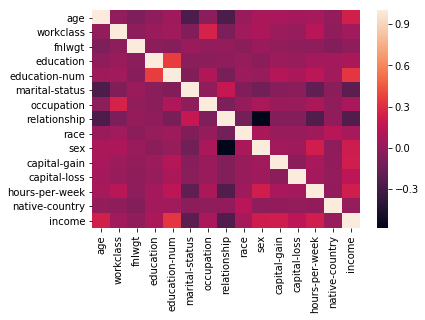

In [67]:
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values
)

#### Test set

In [37]:
# drop all rows with NaN values
df2_test.dropna(inplace=True)

# Replace all string columns with numeric columns
for column in df2_test.columns:
    if df2_test.dtypes[column] == np.object:
        # The column is a string column. Encode it to numeric values.
        df2_test[column] = LabelEncoder().fit_transform(df2_test[column])

X_eval = df2_test.loc[:, [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',]].values
y_eval = df2_test.loc[:, 'income'].values

print(X_eval.shape, y_eval.shape)

(16281, 14) (16281,)


### Standardize

In [38]:
X = StandardScaler().fit_transform(X.astype(np.float64))

In [39]:
X_eval = StandardScaler().fit_transform(X_eval.astype(np.float64))

### Binarize
Change all columns with numeric values to binary/boolean values

In [40]:
X = Binarizer().fit_transform(X)

In [41]:
X_eval = Binarizer().fit_transform(X_eval)

### Split train dataset in a 80/20 ratio (train/validation)

In [42]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

### Logistic Regression

#### GridSearch for the best hyperparameters

In [43]:
clf_log = GridSearchCV(
    estimator=LogisticRegression(),
    param_grid={
        'C': [0.001, 0.01, 0.1, 1, 3, 5, 8, 10, 12, 15, 30, 50, 100, 1000]
    },
    cv=5
).fit(X_train, y_train)

print('Best hyperparameters: {}'.format(clf_log.best_params_))
print('Best score: {}'.format(clf_log.best_score_))

Best hyperparameters: {'C': 5}
Best score: 0.8183353808353808


#### Train the model with the best hyperparameters

In [44]:
lre = LogisticRegression(
    C=clf_log.best_params_['C']
).fit(X_train, y_train)

lre.score(X_test, y_test)

0.8220482112697681

#### Calculate accuracy score on the Validation Set

In [45]:
y_pred = lre.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.8120929911295531

#### Calculate the accuracy score on the Test Set

In [46]:
lre.score(X_eval, y_eval)

0.8205269946563479

In [47]:
y_pred = lre.predict(X_eval)
f1_score(y_eval, y_pred, average='weighted')

0.810513663472967

#### Plot the Confusion Matrix

In [48]:
def plot_confusion_matrix(cm):
    """
    Plots the given confusion matrix.
    cm: The confusion matrix to plot.
    """
    normal_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(normal_cm, cmap=plt.cm.Blues)

In [49]:
cm = confusion_matrix(y_eval, y_pred)
print(cm)

[[11477   958]
 [ 1964  1882]]


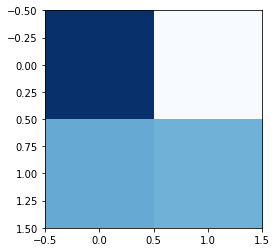

In [50]:
plot_confusion_matrix(cm)

### Random Forest

#### GridSearch for the best hyperparameters

In [51]:
clf_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'n_estimators': [5, 10, 15, 20, 30, 40, 50],
        'min_samples_split': [1.0, 2, 5, 10, 20],
        'min_samples_leaf': [1, 2, 5, 10, 20],
        'min_weight_fraction_leaf': [0., 0.1]
    },
    cv=5
).fit(X_train, y_train)

print('Best hyperparameters: {}'.format(clf_rf.best_params_))
print('Best score: {}'.format(clf_rf.best_score_))

Best hyperparameters: {'min_samples_leaf': 10, 'min_samples_split': 20, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 10}
Best score: 0.8201781326781327


#### Train the model with the best hyperparameters

In [52]:
rf = RandomForestClassifier(
    n_estimators=clf_rf.best_params_['n_estimators'],
    min_samples_split=clf_rf.best_params_['min_samples_split'],
    min_weight_fraction_leaf=clf_rf.best_params_['min_weight_fraction_leaf'],
    min_samples_leaf=clf_rf.best_params_['min_samples_leaf']
).fit(X_train, y_train)

rf.score(X_test, y_test)

0.8241977583294948

#### Calculate accuracy score on the Validation Set

In [53]:
y_pred = rf.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.8130607467643278

#### Calculate the accuracy score on the Test Set

In [54]:
rf.score(X_eval, y_eval)

0.825563540323076

In [55]:
y_pred = rf.predict(X_eval)
f1_score(y_eval, y_pred, average='weighted')

0.8142109209417802

#### Plot the Confusion Matrix

In [56]:
cm = confusion_matrix(y_eval, y_pred)
print(cm)

[[11585   850]
 [ 1990  1856]]


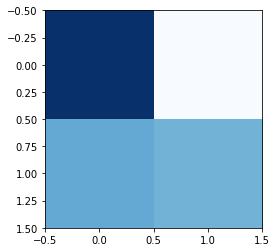

In [57]:
plot_confusion_matrix(cm)

### Multilayer Perceptron

#### GridSearch for the best hyperparameters

In [58]:
clf_mlp = GridSearchCV(
    estimator=MLPClassifier(max_iter=1000),
    param_grid={
        'hidden_layer_sizes': [(50,), (10, 20, 10), (50, 25, 15, 10, 5), (50, 40, 50), (50, 40, 30, 20, 10)],
        'alpha': [0.0001, 0.001, 0.01],
        'learning_rate_init': [0.0001, 0.001, 0.01]
    },
    cv=5
).fit(X_train, y_train)

print('Best hyperparameters: {}'.format(clf_mlp.best_params_))
print('Best score: {}'.format(clf_mlp.best_score_))

Best hyperparameters: {'alpha': 0.001, 'hidden_layer_sizes': (50,), 'learning_rate_init': 0.001}
Best score: 0.8223664004914005


#### Train the model with the best hyperparameters

In [59]:
mlp = MLPClassifier(
    hidden_layer_sizes=clf_mlp.best_params_['hidden_layer_sizes'],
    alpha=clf_mlp.best_params_['alpha'],
    learning_rate_init=clf_mlp.best_params_['learning_rate_init'],
    max_iter=1000
).fit(X_train, y_train)

mlp.score(X_test, y_test)

0.8251189927836634

#### Calculate accuracy score on the Validation Set

In [60]:
y_pred = mlp.predict(X_test)
f1_score(y_test, y_pred, average='weighted')

0.8179720397140297

#### Calculate the accuracy score on the Test Set

In [61]:
mlp.score(X_eval, y_eval)

0.8250721700141269

In [62]:
y_pred = mlp.predict(X_eval)
f1_score(y_eval, y_pred, average='weighted')

0.8177322110001605

#### Plot the Confusion Matrix

In [63]:
cm = confusion_matrix(y_eval, y_pred)
print(cm)

[[11407  1028]
 [ 1820  2026]]


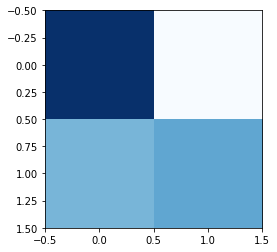

In [64]:
plot_confusion_matrix(cm)